Pré-visualização dos dados:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

🔹 Regressão Linear
RMSE: 0.675
R²: 0.653

🔹 XGBoost
RMSE: 0.472
R²: 0.830

🔹 Rede Neural (MLP)
RMSE: 0.533
R²: 0.783

✅ Melhor desempenho: XGBoost


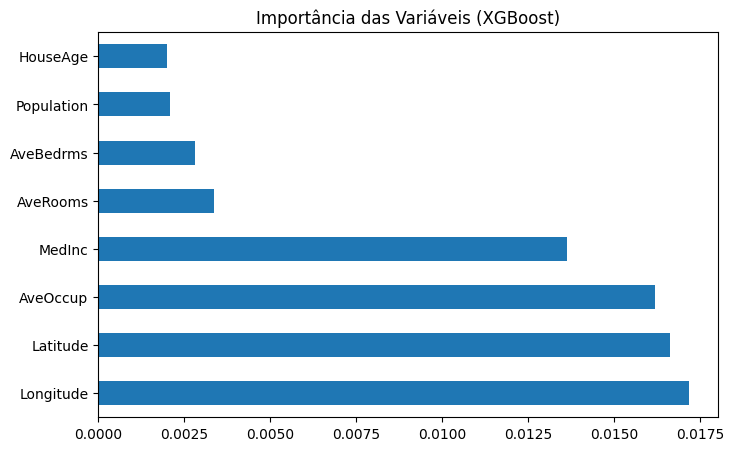

In [1]:
# Questão 6 – Previsão do Valor de Imóveis

# 1️⃣ Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# 2️⃣ Carregar dataset California Housing
data = fetch_california_housing(as_frame=True)
df = data.frame
print("Pré-visualização dos dados:")
print(df.head())

# 3️⃣ Separar variáveis independentes e dependente
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# 4️⃣ Feature Engineering (exemplo: adicionar interações polinomiais simples)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5️⃣ Modelo 1: Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# 6️⃣ Modelo 2: XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# 7️⃣ Modelo 3: Rede Neural Artificial (MLP)
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# 8️⃣ Função para avaliar desempenho
def avaliar_modelo(nome, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔹 {nome}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    return rmse, r2

rmse_lr, r2_lr = avaliar_modelo("Regressão Linear", y_test, lr_pred)
rmse_xgb, r2_xgb = avaliar_modelo("XGBoost", y_test, xgb_pred)
rmse_mlp, r2_mlp = avaliar_modelo("Rede Neural (MLP)", y_test, mlp_pred)

# 9️⃣ Comparar resultados
melhor_modelo = min([(rmse_lr, "Regressão Linear"),
                     (rmse_xgb, "XGBoost"),
                     (rmse_mlp, "Rede Neural")])[1]
print(f"\n✅ Melhor desempenho: {melhor_modelo}")

# 10️⃣ Mostrar importância das variáveis (XGBoost)
import matplotlib.pyplot as plt
importances = xgb.feature_importances_[:len(X.columns)]  # apenas features originais
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', figsize=(8,5), title='Importância das Variáveis (XGBoost)')
plt.show()

O modelo XGBoost teve o menor erro. Para otimizar,um ajuste de hiperparâmetros, mais feature engineering e validação cruzada.